In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn.datasets as gen
import numpy.random as rng

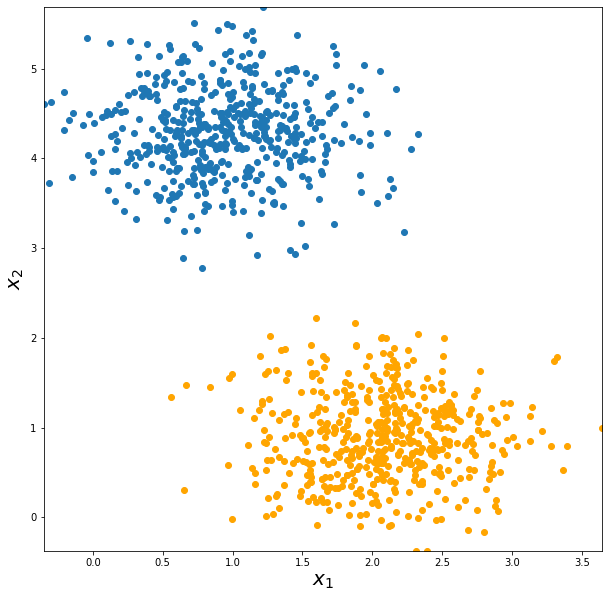

In [34]:
# Generate simple binary classification dataset
X, y = gen.make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0, cluster_std=0.5)

class0_ix = y == 0
class1_ix = y == 1

# plot dataset
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(X[class0_ix, 0], X[class0_ix, 1])
ax.scatter(X[class1_ix, 0], X[class1_ix, 1], color='orange')
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_xlim([np.min(X[:, 0]), np.max(X[:, 0])])
ax.set_ylim([np.min(X[:, 1]), np.max(X[:, 1])])
    
plt.savefig('figures/simple_binary_classification.png', trasparent=False, pad_inches=0.05, bbox_inches='tight')


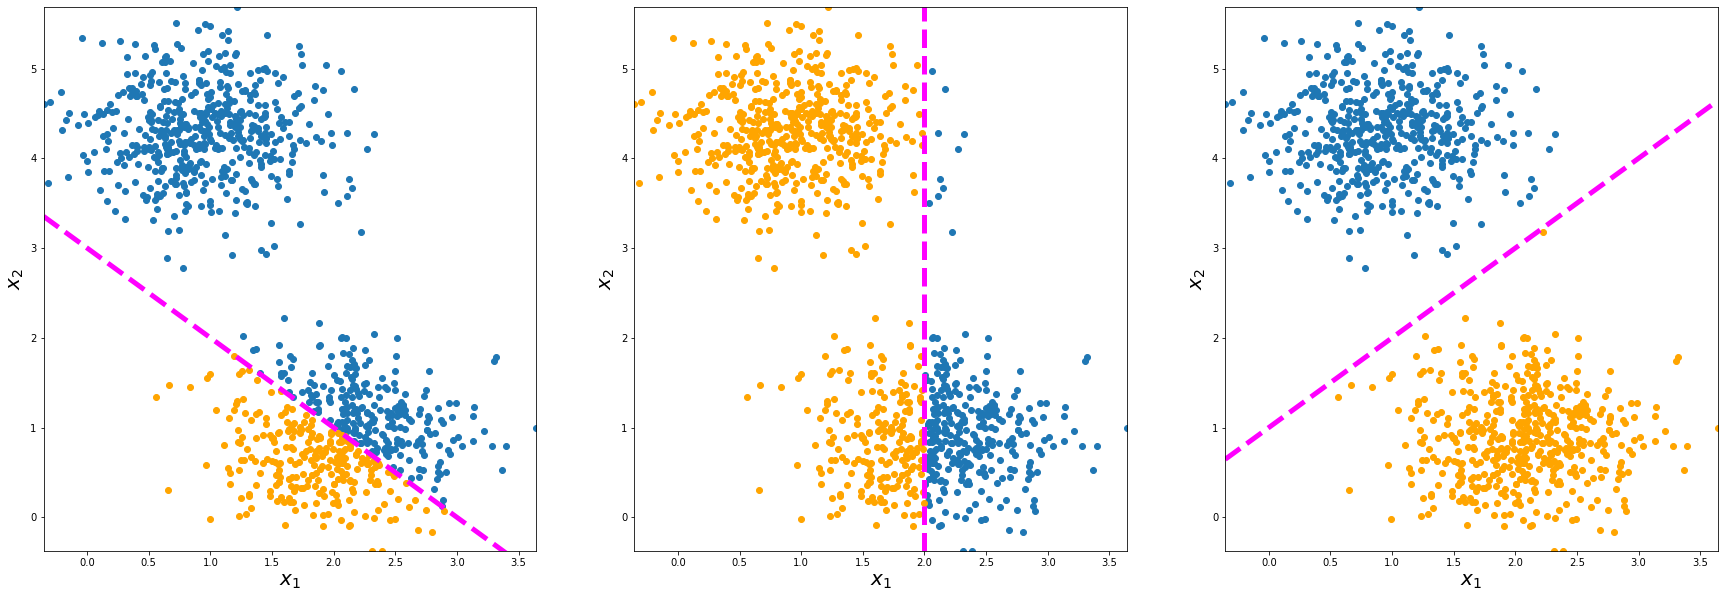

In [42]:
# plot different classifier lines
candidate_lines = [
    [1, 1, 3],
    [1, 0, 2],
    [-1, 1, 1]
]

f, axes = plt.subplots(1, 3, figsize=(30, 10))

for i, l in enumerate(candidate_lines):
    a, b, c = l
    x1 = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 1000)
    if b != 0:
        y = (c - a * x1) / b 
    else:
        x1 = np.ones_like(x1) * c / a
        y = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 1000)
    
    ax = axes[i]
    ax.plot(x1, y, color='magenta', linewidth=5, linestyle='dashed')

    # plug points into the lines equation
    yhat = a * X[:, 0] + b * X[:, 1]

    # compute diff
    diff = yhat - c

    # generate predictions
    pred_class1 = diff < 0

    # plot predictions
    ax.scatter(X[~pred_class1, 0], X[~pred_class1, 1])
    ax.scatter(X[pred_class1, 0], X[pred_class1, 1], color='orange')
    ax.set_xlim([np.min(X[:, 0]), np.max(X[:, 0])])
    ax.set_ylim([np.min(X[:, 1]), np.max(X[:, 1])])
    ax.set_xlabel('$x_1$', fontsize=20)
    ax.set_ylabel('$x_2$', fontsize=20)
plt.savefig('figures/simple_binary_classification_lines.png', trasparent=False, pad_inches=0.05, bbox_inches='tight')


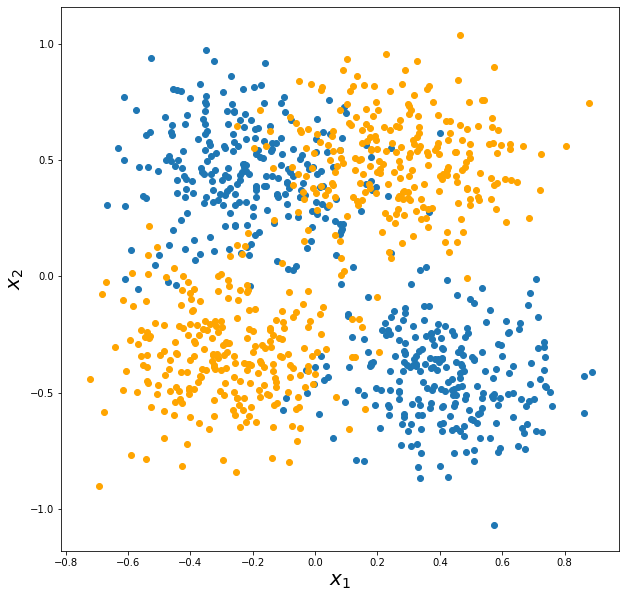

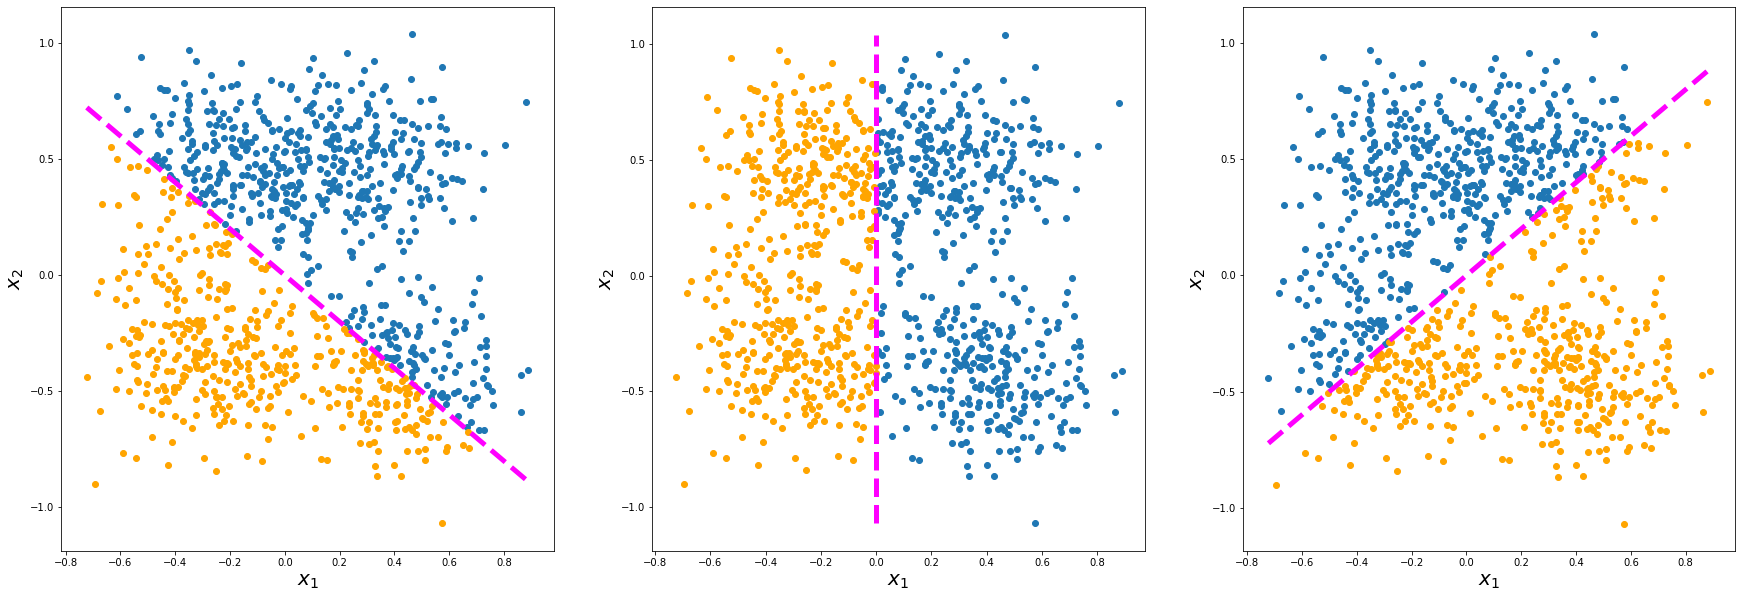

In [79]:
# Generate simple binary classification dataset
X, y = gen.make_blobs(n_samples=1000, centers=4, n_features=2, random_state=31, cluster_std=4)
X /= 20
y = y % 3
y = (y == 1) | (y == 2)

class0_ix = y == 0
class1_ix = y == 1

# plot dataset
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(X[class0_ix, 0], X[class0_ix, 1])
ax.scatter(X[class1_ix, 0], X[class1_ix, 1], color='orange')
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
plt.savefig('figures/nonseparable_binary_classification.png', trasparent=False, pad_inches=0.05, bbox_inches='tight')

np.savez('data/binary_classification', X=X, y=y[:,np.newaxis])

# plot different classifier lines
candidate_lines = [
    [0.5, 0.5, 0],
    [1, 0, 0],
    [-1, 1, 0]
]

f, axes = plt.subplots(1, 3, figsize=(30, 10))

for i, l in enumerate(candidate_lines):
    a, b, c = l
    x1 = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 1000)
    if b != 0:
        y = (c - a * x1) / b 
    else:
        x1 = np.ones_like(x1) * c / a
        y = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 1000)
    
    ax = axes[i]
    ax.plot(x1, y, color='magenta', linewidth=5, linestyle='dashed')

    # plug points into the lines equation
    yhat = a * X[:, 0] + b * X[:, 1]

    # compute diff
    diff = yhat - c

    # generate predictions
    pred_class1 = diff < 0

    # plot predictions
    ax.scatter(X[~pred_class1, 0], X[~pred_class1, 1])
    ax.scatter(X[pred_class1, 0], X[pred_class1, 1], color='orange')
    ax.set_xlabel('$x_1$', fontsize=20)
    ax.set_ylabel('$x_2$', fontsize=20)
plt.savefig('figures/nonseparable_binary_classification_lines.png', trasparent=False, pad_inches=0.05, bbox_inches='tight')



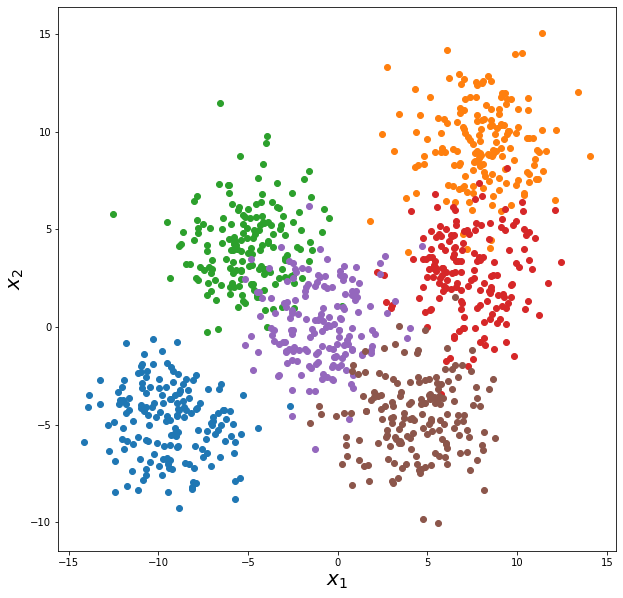

In [3]:
# Generate multiclass classification dataset
n_classes = 6
X, y = gen.make_blobs(n_samples=1000, centers=n_classes, n_features=2, random_state=234, cluster_std=2.0)

# plot dataset
f, ax = plt.subplots(1, 1, figsize=(10, 10))
for i in range(n_classes):
    ix = y == i
    ax.scatter(X[ix, 0], X[ix, 1])
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
plt.savefig('figures/multiclass_classification.png', trasparent=False, pad_inches=0.05, bbox_inches='tight')
np.savez('data/multiclass_classification', X=X, y=y[:,np.newaxis])

# augment with some noise
noise_X = rng.randn(X.shape[0], 10) * 2
X = np.hstack((X, noise_X))
np.savez('data/multiclass_classification_hard', X=X, y=y[:,np.newaxis])

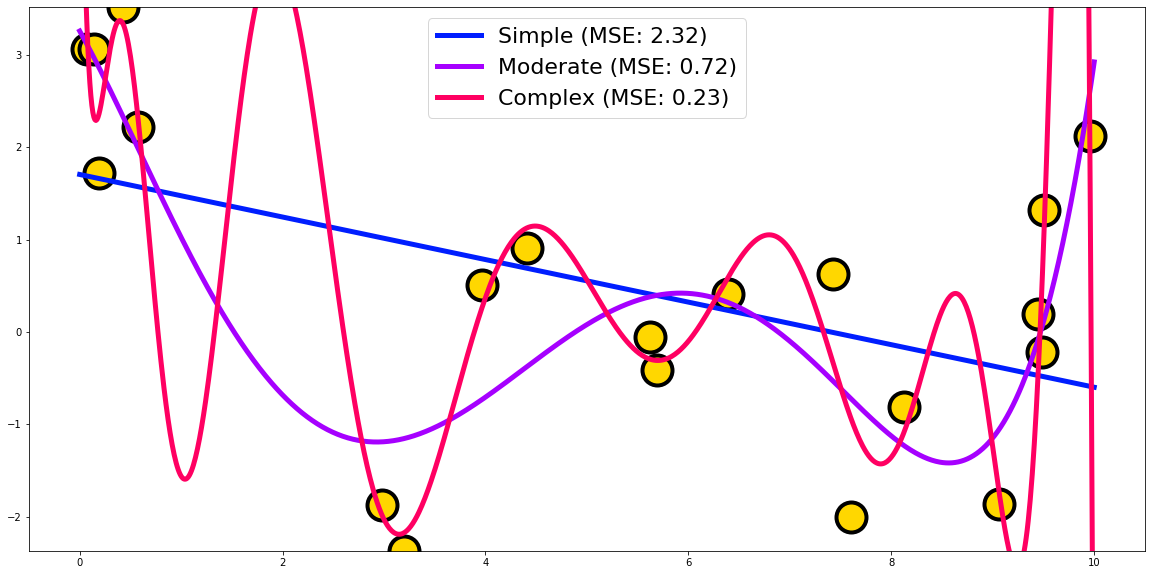

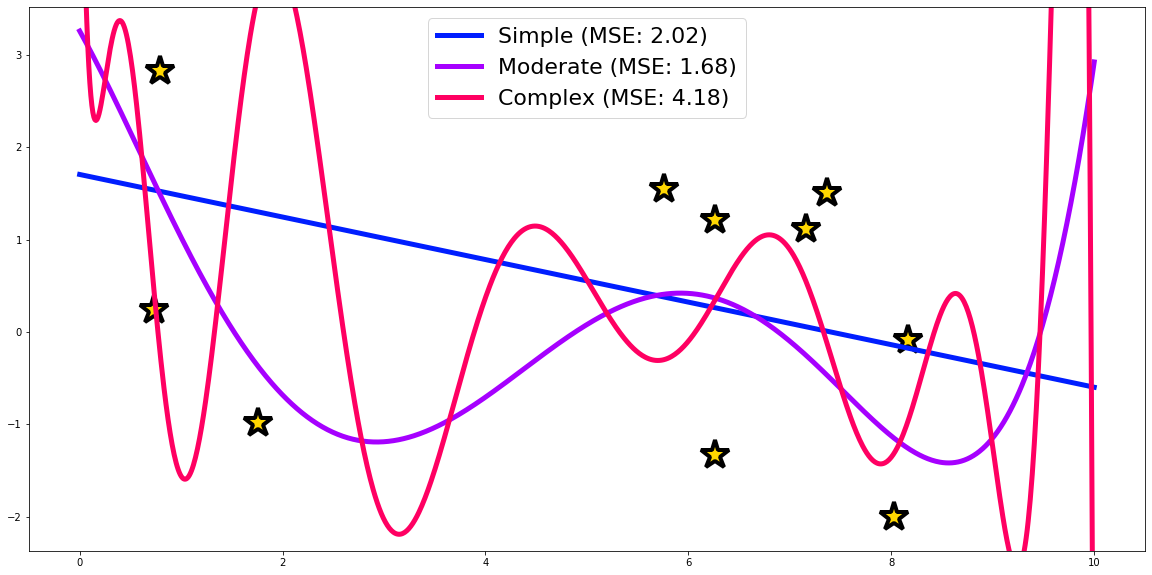

In [52]:
data = np.load('code/day2/fake_data.npz')
X, y = data['X'], data['y']

Xtrain = X[:20,:]
ytrain = y[:20,:]

Xtest = X[20:,:]
ytest = y[20:,:]

degs = [1, 5, 15]
titles = ['Simple', 'Moderate', 'Complex']
colors = ['#001eff', '#a600ff', '#ff0062']

f, ax = plt.subplots(1, 1, figsize=(20, 10))

xp = np.linspace(0, 10, 1000)

# training
ax.plot(Xtrain[:,0], ytrain[:,0], marker='o', linestyle='', color='gold', 
        markersize=30, markeredgewidth=4, markeredgecolor='black')

ax.set_ylim([np.min(y[:,0]), np.max(y[:,0])])
    
    
for i in range(len(degs)):
    deg = degs[i]
    
    z = np.polyfit(Xtrain[:,0], ytrain[:,0], deg=deg)
    p = np.poly1d(z)
    
    
    yhat = p(Xtrain[:,0])
    mse = np.mean(np.square(yhat - ytrain[:,0]))
    
    ax.plot(xp, p(xp), linewidth=5, color=colors[i], label='%s (MSE: %0.2f)' % (titles[i], mse))

ax.legend(fontsize=22)
plt.savefig('figures/generalization_training.png', trasparent=False, pad_inches=0.05, bbox_inches='tight')

# testing
f, ax = plt.subplots(1, 1, figsize=(20, 10))

xp = np.linspace(0, 10, 1000)

ax.plot(Xtest[:,0], ytest[:,0], marker='*', linestyle='', color='gold', 
        markersize=30, markeredgewidth=4, markeredgecolor='black')

ax.set_ylim([np.min(y[:,0]), np.max(y[:,0])])
    
    
for i in range(len(degs)):
    deg = degs[i]
    
    z = np.polyfit(Xtrain[:,0], ytrain[:,0], deg=deg)
    p = np.poly1d(z)
    
    yhat = p(Xtest[:,0])
    mse = np.mean(np.square(yhat - ytest[:,0]))
    
    ax.plot(xp, p(xp), linewidth=5, color=colors[i], label='%s (MSE: %0.2f)' % (titles[i], mse))

ax.legend(fontsize=22)
plt.savefig('figures/generalization_testing.png', trasparent=False, pad_inches=0.05, bbox_inches='tight')

